<a href="https://colab.research.google.com/github/Siddharthgolecha/Quantum-State-Reconstruction/blob/main/Reconstructing_randomly_generated_Quantum_state_using_Swap_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Run this cell only if the following libraries are either not present
#or not latest
!pip install --upgrade qiskit
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade matplotlib

     |████████████████████████████████| 8.5MB 8.0MB/s 
     |████████████████████████████████| 17.6MB 245kB/s 
     |████████████████████████████████| 204kB 45.1MB/s 
     |████████████████████████████████| 204kB 50.5MB/s 
     |████████████████████████████████| 2.1MB 46.3MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 5.9MB 30.2MB/s 
     |████████████████████████████████| 1.3MB 36.8MB/s 
     |████████████████████████████████| 194kB 38.4MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 583kB 45.2MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 3.2MB 51.1MB/s 
     |████████████████████████████████| 5.5MB 30.7MB/s 
  Created wheel for qiskit: filename=qiskit-0.23.5-cp36-none-any.whl size=2882 sha256=50c4afa9cc6af404a613bd8eeafb6ab817f230aec1327355bdae5681f566d1f1
  Stored in directory: /root/.cache/pip/wheels/0a/a7/8f/2720a308d16a991

In [1]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from math import pi
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize 

In [2]:
#The more number of shots will definitely increase accurate proabilities but
#also time complexity. So change this value wisely!
shots = 2000 

# Reconstructing randomly generated Quantum state using Swap test

## Swap test
The [Swap test](https://en.wikipedia.org/wiki/Swap_test) is a simple quantum circuit which, given two states, allows to compute how much do they differ from each other.

![Swap Test Circuit](https://upload.wikimedia.org/wikipedia/commons/d/d6/Quantum-swap-test-circuit-correct.png)

Let's dive a bit into calculations!
<br>
<br>

Consider two states: ![|phi> and |psi>](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%7B%5Cdisplaystyle%20%7C%5Cphi%20%5Crangle%20%7D%20%5C%20and%5C%20%7B%5Cdisplaystyle%20%7C%5Cpsi%20%5Crangle%7D%7D) . The state of the system at the beginning of the protocol is ![|0,phi,psi>](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%7B%5Cdisplaystyle%20%7C0%2C%5Cphi%20%2C%5Cpsi%20%5Crangle%20%7D%7D).

After applying the Swap test and before measuring the state of the circuit is

![final state formula](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%7B%5Cdisplaystyle%20%7B%5Cfrac%20%7B1%7D%7B2%7D%7D%28%7C0%2C%5Cphi%20%2C%5Cpsi%20%5Crangle%20+%7C1%2C%5Cphi%20%2C%5Cpsi%20%5Crangle%20+%7C0%2C%5Cpsi%20%2C%5Cphi%20%5Crangle%20-%7C1%2C%5Cpsi%20%2C%5Cphi%20%5Crangle%20%29%3D%7B%5Cfrac%20%7B1%7D%7B2%7D%7D%7C0%5Crangle%20%28%7C%5Cphi%20%2C%5Cpsi%20%5Crangle%20+%7C%5Cpsi%20%2C%5Cphi%20%5Crangle%20%29+%7B%5Cfrac%20%7B1%7D%7B2%7D%7D%7C1%5Crangle%20%28%7C%5Cphi%20%2C%5Cpsi%20%5Crangle%20-%7C%5Cpsi%20%2C%5Cphi%20%5Crangle%20%29%7D%7D)

The Measurement gate on the first qubit ensures that it's 0 with a probability of
![|0> Measurement probability](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%7B%5Cdisplaystyle%20P%28%7B%5Ctext%7BFirst%20qubit%7D%7D%3D0%29%3D%7B%5Cfrac%20%7B1%7D%7B2%7D%7D%7B%5CBig%20%28%7D%5Clangle%20%5Cphi%20%7C%5Clangle%20%5Cpsi%20%7C+%5Clangle%20%5Cpsi%20%7C%5Clangle%20%5Cphi%20%7C%7B%5CBig%20%29%7D%7B%5Cfrac%20%7B1%7D%7B2%7D%7D%7B%5CBig%20%28%7D%7C%5Cphi%20%5Crangle%20%7C%5Cpsi%20%5Crangle%20+%7C%5Cpsi%20%5Crangle%20%7C%5Cphi%20%5Crangle%20%7B%5CBig%20%29%7D%3D%7B%5Cfrac%20%7B1%7D%7B2%7D%7D+%7B%5Cfrac%20%7B1%7D%7B2%7D%7D%7B%7C%5Clangle%20%5Cpsi%20%7C%5Cphi%20%5Crangle%20%7C%7D%5E%7B2%7D%7D%7D)

when measured. If  ![|phi> and |psi>](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%7B%5Cdisplaystyle%20%7C%5Cphi%20%5Crangle%20%7D%20%5C%20and%5C%20%7B%5Cdisplaystyle%20%7C%5Cpsi%20%5Crangle%7D%7D)  are orthogonal ![Orthogonal measurement](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%7B%5Cdisplaystyle%20%28%7B%7C%5Clangle%20%5Cpsi%20%7C%5Cphi%20%5Crangle%20%7C%7D%5E%7B2%7D%3D0%29%7D%7D), then the probability that 0 is measured is 0.5. If the states are equal ![Same measurement](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%7B%5Cdisplaystyle%20%28%7B%7C%5Clangle%20%5Cpsi%20%7C%5Cphi%20%5Crangle%20%7C%7D%5E%7B2%7D%3D1%29%7D%7D), then the probability that 0 is measured is 1. 

In [3]:
#Swap Test

def swap_test(qc):
  '''
  Return None

  Adds Swap Test to the Quantum Circuit.

  Keyword arguments:
    qc -> Quantum Circuit provided to add the Swap Test. 
  '''
  qc.initialize([1,0],0)
  qc.h(0)
  qc.cswap(0,1,2)
  qc.h(0)
  qc.measure(0,0)

In [27]:
def generate_state(theta = -1,
                   phi = 0,
                   lambda_ = np.pi):
  '''
  Returns an array of parameters to generate a random state with U3 gate

  Keyword arguments:
    theta = np.pi
    phi = 0
    lambda_ = np.pi
  '''
  if theta == -1:
    theta = np.random.random()*2*np.pi
  return np.array([theta, phi, lambda_])

## Parameters needed to be changed

![U3 gate](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7DU3%28%5Ctheta%2C%5Cphi%2C%5Clambda%29%3D%5Cbegin%7Bpmatrix%7D%5Ccos%28%5Cfrac%7B%5Ctheta%7D%7B2%7D%29%20%26%20-e%5E%7Bi%5Clambda%7D%5Csin%28%5Cfrac%7B%5Ctheta%7D%7B2%7D%29%20%5C%5C%20e%5E%7Bi%5Cphi%7D%5Csin%28%5Cfrac%7B%5Ctheta%7D%7B2%7D%29%20%26%20e%5E%7Bi%28%5Cphi+%5Clambda%29%7D%5Ccos%28%5Cfrac%7B%5Ctheta%7D%7B2%7D%29%5Cend%7Bpmatrix%7D%7D)
![1](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%20U3%7B%7C%5Cphi%5Crangle%7D%20%3D%20%7B%5Cbegin%7Bpmatrix%7D%5Ccos%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%20%26%20-e%5E%7Bi%5Clambda_%7B1%7D%7D%5Csin%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%20%5C%5C%20e%5E%7Bi%5Cphi_%7B1%7D%7D%5Csin%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%20%26%20e%5E%7Bi%28%5Cphi_%7B1%7D+%5Clambda_%7B1%7D%29%7D%5Ccos%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%5Cend%7Bpmatrix%7D%20%5Cbegin%7Bpmatrix%7D1%20%5C%5C%200%5Cend%7Bpmatrix%7D%7D%20%5Cbreak%20%3D%20%5Cbegin%7Bpmatrix%7D%5Ccos%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%20%5C%5C%20e%5E%7Bi%5Cphi_%7B1%7D%7D%5Csin%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%20%5Cend%7Bpmatrix%7D%20%7D)
![2](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%20U3%7B%7C%5Cpsi%5Crangle%7D%20%3D%20%7B%5Cbegin%7Bpmatrix%7D%5Ccos%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%20%26%20-e%5E%7Bi%5Clambda_%7B2%7D%7D%5Csin%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%20%5C%5C%20e%5E%7Bi%5Cphi_%7B2%7D%7D%5Csin%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%20%26%20e%5E%7Bi%28%5Cphi_%7B2%7D+%5Clambda_%7B2%7D%29%7D%5Ccos%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%5Cend%7Bpmatrix%7D%20%5Cbegin%7Bpmatrix%7D1%20%5C%5C%200%5Cend%7Bpmatrix%7D%7D%20%5Cbreak%20%3D%20%5Cbegin%7Bpmatrix%7D%5Ccos%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%20%5C%5C%20e%5E%7Bi%5Cphi_%7B1%7D%7D%5Csin%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%20%5Cend%7Bpmatrix%7D%20%7D)
![3](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%20%7B%7C%5Clangle%20%5Cpsi%20%7C%5Cphi%20%5Crangle%20%7C%7D%5E%7B2%7D%20%5C%5C%20%3D%20%7B%5CBig%5Crvert%5Cbegin%7Bpmatrix%7D%5Ccos%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%20%26%20e%5E%7Bi%5Cphi_%7B2%7D%7D%5Csin%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%20%5Cend%7Bpmatrix%7D%5Cbegin%7Bpmatrix%7D%5Ccos%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%20%5C%5C%20e%5E%7Bi%5Cphi_%7B1%7D%7D%5Csin%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%20%5Cend%7Bpmatrix%7D%5CBig%5Clvert%7D%5E2%20%7D)
![4](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%20%7B%7C%5Clangle%20%5Cpsi%20%7C%5Cphi%20%5Crangle%20%7C%7D%5E%7B2%7D%20%5C%5C%20%3D%20%7B%5CBig%5Crvert%5Ccos%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%5Ccos%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%20+%20e%5E%7Bi%28%7B%5Cphi_%7B2%7D+%5Cphi_%7B1%7D%7D%29%7D%5Csin%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%5Csin%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%5CBig%5Clvert%7D%5E2%20%7D)
![5](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%20%7B%7C%5Clangle%20%5Cpsi%20%7C%5Cphi%20%5Crangle%20%7C%7D%5E%7B2%7D%20%5C%5C%20%3D%20%5Ccos%5E2%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%5Ccos%5E2%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%20+%20%5Csin%5E2%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%5Csin%5E2%28%5Cfrac%7B%5Ctheta_%7B1%7D%7D%7B2%7D%29%20%5C%20%5C%20%5C%20%5B%5Crvert%20%7Be%5E%7Bi%28%7B%5Cphi_%7B2%7D+%5Cphi_%7B1%7D%7D%29%7D%5Clvert%20%5E%202%20%3D%201%7D%5D%20%7D)

Hence only 1 parameter ![theta](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%20%5Ctheta%20%7D) needs to be changed. So when ![theta1=theta2](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%20%5Ctheta_%7B1%7D%20%3D%20%5Ctheta_%7B2%7D%20%7D)

![6](https://latex.codecogs.com/png.download?%5Clarge%20%7B%5Ccolor%7BGreen%7D%20%5Cfrac%7B1%7D%7B2%7D%20+%20%5Cfrac%7B1%7D%7B2%7D%7B%7B%7C%5Clangle%20%5Cpsi%20%7C%5Cphi%20%5Crangle%20%7C%7D%5E%7B2%7D%20%3D%20%5Cfrac%7B1%7D%7B2%7D%20+%20%5Cfrac%7B1%7D%7B2%7D.2%28%5Ccos%5E2%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%20+%20%5Csin%5E2%28%5Cfrac%7B%5Ctheta_%7B2%7D%7D%7B2%7D%29%29%7D%20%3D%201%20%7D)

In [5]:
def swap_error(params1, params2):
  '''
  Returns the error produced by swap test from 0 to 1.

  Maps swap test results of 1/2 to 1 to 1 to 0

  Keyword arguments:
    params1 -> Parameters for the phi state
    params2 -> Parameters for the psi state
  '''
  qc = QuantumCircuit(3,1)
  qc.u(params1[0],params1[1],params1[2],1)
  qc.u(params2[0],params2[1],params2[2],2)
  swap_test(qc)
  
  backend = BasicAer.get_backend('qasm_simulator')
  results = execute(qc, backend=backend, shots=shots).result()
  answer = results.get_counts()

  return abs(min((answer['0']/shots)-1,1) * 2)

In [13]:
def train(params1, params2, epochs=100):
  '''
  Returns a dictionary with the parameters and histroy of training

  Keyword arguments:
    params1 -> Parameters for the phi state
    params2 -> Parameters for the psi state
    epochs = 100 -> Total number of epochs
  '''
  history = []
  pi = np.pi
  for epoch in range(epochs):
    error = swap_error(params1,params2)
    new_state1 = np.array(params1)
    new_state1[0] = (float(new_state1[0]) + error*pi)%(2*pi)
    error1 = swap_error(new_state1,params2)
    new_state2 = np.array(params1)
    new_state2[0] = (float(new_state2[0]) - error*pi)%(2*pi)
    error2 = swap_error(new_state2,params2)
    if error2 > error1:
      params1 = new_state1
      history.append(error1)
    else:
      params1 = new_state2
      history.append(error2)

  return {"history": history, "params": params1}

In [9]:
params1 = generate_state()
print(params1)
params2 = generate_state()
print(params2)

[4.63793481 0.         3.14159265]
[5.43134448 0.         3.14159265]


In [14]:
result = train(params1,params2)
tparams = result["params"]
print(tparams)

[5.37935067 0.         3.14159265]


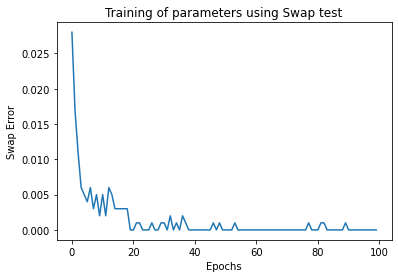

In [16]:
plt.plot(result['history'])
plt.xlabel('Epochs')
plt.ylabel('Swap Error')
plt.title('Training of parameters using Swap test')
plt.show()

In [17]:
q = QuantumCircuit(3,1)
q.u(tparams[0],tparams[1],tparams[2],1)
q.u(params2[0],params2[1],params2[2],2)
q.draw()

q_0: ─────────────────
     ┌───────────────┐
q_1: ┤ U(5.3794,0,π) ├
     ├───────────────┤
q_2: ┤ U(5.4313,0,π) ├
     └───────────────┘
c: 1/═════════════════

In [18]:
swap_test(q)
q.draw()

┌─────────────────┐┌───┐   ┌───┐┌─┐
q_0: ┤ initialize(1,0) ├┤ H ├─■─┤ H ├┤M├
     └┬───────────────┬┘└───┘ │ └───┘└╥┘
q_1: ─┤ U(5.3794,0,π) ├───────X───────╫─
      ├───────────────┤       │       ║ 
q_2: ─┤ U(5.4313,0,π) ├───────X───────╫─
      └───────────────┘               ║ 
c: 1/═════════════════════════════════╩═
                                      0

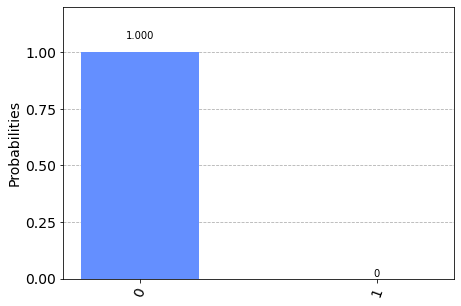

In [20]:
from qiskit import execute, Aer, BasicAer
 
backend = BasicAer.get_backend('qasm_simulator')
results = execute(q, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [23]:
N = 3 #N qubit state
n = 2*N + 1
choice = [0,np.pi]

In [35]:
qc = QuantumCircuit(n,1)
psi_params = []
phi_params = []
for i in range(1,N+1):
  state = generate_state(theta = choice[np.random.randint(0,len(choice))])
  qc.u(state[0],state[1],state[2],i)
  phi_params.append(state)
for i in range(N+1,n):
  state = generate_state(theta = choice[np.random.randint(0,len(choice))])
  psi_params.append(state)
qc.draw()

q_0: ────────────
     ┌──────────┐
q_1: ┤ U(π,0,π) ├
     ├──────────┤
q_2: ┤ U(0,0,π) ├
     ├──────────┤
q_3: ┤ U(0,0,π) ├
     └──────────┘
q_4: ────────────
                 
q_5: ────────────
                 
q_6: ────────────
                 
c: 1/════════════

In [37]:
print(psi_params)

[array([3.14159265, 0.        , 3.14159265]), array([3.14159265, 0.        , 3.14159265]), array([3.14159265, 0.        , 3.14159265])]


In [38]:
for i in range(N+1,n):
  val = (swap_error(psi_params[i-N-1],phi_params[i-N-1]) == 0)
  state = generate_state(theta = choice[val])
  qc.u(state[0],state[1],state[2],i)

qc.draw()

q_0: ────────────
     ┌──────────┐
q_1: ┤ U(π,0,π) ├
     ├──────────┤
q_2: ┤ U(0,0,π) ├
     ├──────────┤
q_3: ┤ U(0,0,π) ├
     ├──────────┤
q_4: ┤ U(π,0,π) ├
     ├──────────┤
q_5: ┤ U(0,0,π) ├
     ├──────────┤
q_6: ┤ U(0,0,π) ├
     └──────────┘
c: 1/════════════

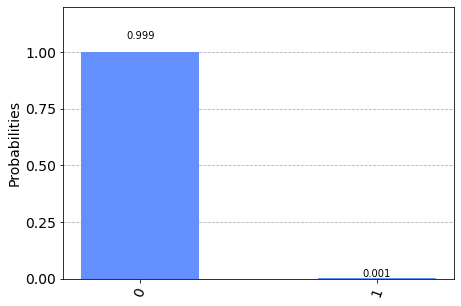

In [39]:
backend = BasicAer.get_backend('qasm_simulator')
results = execute(q, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)